# Protein correlation analysis for the top CITE-seq solution

In this notebook, we"ll see how predicted values of surface proteins correlate with ground truth data. We will use the solution of rank 2 team "senkin & tmp". Their submission showed an excellent result for the CITE-seq modality, outperforming all other solutions by a wide margin and exceeding our estimated lower-bound of possible performance. We will see, which proteins can it predict well and which are still not predicted correctly.

To run this notebook, you need to download the submssion of rank 2 team. It is publicly available in their notebook [on Kaggle](https://www.kaggle.com/code/senkin13/2nd-place-gru-cite). Download the `submission.csv` file from their code output, rename it to `rank_2_top_cite_seq_model_submission.csv`, and put it to the `data/` directory. Then you can run this notebook to reproduce our results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

In [ ]:
CITE_FEATURE_NAMES = [ "CD86", "CD274", "CD270", "CD155", "CD112", "CD47", "CD48", "CD40", "CD154", "CD52", "CD3", "CD8", "CD56", "CD19", "CD33", "CD11c", "HLA-A-B-C", "CD45RA", "CD123", "CD7", "CD105", "CD49f", "CD194", "CD4",
    "CD44", "CD14", "CD16", "CD25", "CD45RO", "CD279", "TIGIT", "Mouse-IgG1", "Mouse-IgG2a", "Mouse-IgG2b", "Rat-IgG2b", "CD20", "CD335", "CD31", "Podoplanin", "CD146", "IgM", "CD5", "CD195", "CD32", "CD196", "CD185", "CD103", "CD69", "CD62L",
    "CD161", "CD152", "CD223", "KLRG1", "CD27", "CD107a", "CD95", "CD134", "HLA-DR", "CD1c", "CD11b", "CD64", "CD141", "CD1d", "CD314", "CD35", "CD57", "CD272", "CD278", "CD58", "CD39", "CX3CR1", "CD24", "CD21", "CD11a", 
    "CD79b", "CD244", "CD169", "integrinB7", "CD268", "CD42b", "CD54", "CD62P", "CD119", "TCR", "Rat-IgG1", "Rat-IgG2a", "CD192", "CD122", "FceRIa", "CD41", "CD137", "CD163", "CD83", "CD124", "CD13", "CD2", "CD226", "CD29", "CD303", "CD49b",
    "CD81", "IgD", "CD18", "CD28", "CD38", "CD127", "CD45", "CD22", "CD71", "CD26", "CD115", "CD63", "CD304", "CD36", "CD172a", "CD72", "CD158", "CD93", "CD49a", "CD49d", "CD73", "CD9", "TCRVa7.2", "TCRVd2", "LOX-1", "CD158b",
    "CD158e1", "CD142", "CD319", "CD352", "CD94", "CD162", "CD85j", "CD23", "CD328", "HLA-E", "CD82", "CD101", "CD88", "CD224"
 ]

In [3]:
data = pl.read_csv(
    "data/rank_2_top_cite_seq_model_submission.csv",
    n_rows=6812820,
)
data = data.rename({"target": "prediction"})
data

row_id,prediction
i64,f64
0,-0.569636
1,-0.524233
2,-0.352286
3,1.292455
4,1.361938
…,…
6812815,-0.33956
6812816,3.208631
6812817,-0.572259


In [4]:
solution = pl.read_csv("data/solution.csv")
solution

row_id,group_id,target,Usage
i64,i64,f64,str
0,49316,1.167804,"""Ignored"""
1,49316,0.62253,"""Ignored"""
2,49316,0.106959,"""Ignored"""
3,49316,0.324989,"""Ignored"""
4,49316,3.331674,"""Ignored"""
…,…,…,…
65744175,11239,6.113665,"""Public"""
65744176,11239,0.0,"""Public"""
65744177,11239,0.0,"""Public"""


In [5]:
solution = solution.filter(pl.col('Usage') == 'Public').drop('Usage')
solution

row_id,group_id,target
i64,i64,f64
1046640,57329,1.489006
1046641,57329,0.388723
1046642,57329,1.463057
1046643,57329,6.075767
1046644,57329,8.981982
…,…,…
65744175,11239,6.113665
65744176,11239,0.0
65744177,11239,0.0


In [6]:
data = solution.join(data, on="row_id", how="inner")
data

row_id,group_id,target,prediction
i64,i64,f64,f64
1046640,57329,1.489006,0.188117
1046641,57329,0.388723,-0.547613
1046642,57329,1.463057,-0.290874
1046643,57329,6.075767,1.743612
1046644,57329,8.981982,1.248889
…,…,…,…
3051435,1381,1.35847,-0.37993
3051436,1381,6.628082,2.120699
3051437,1381,0.849498,-0.49186


In [7]:
data = data.with_columns(
    pl.Series("gene", np.repeat(CITE_FEATURE_NAMES, data.shape[0] // len(CITE_FEATURE_NAMES)))
)

In [8]:
data

row_id,group_id,target,prediction,gene
i64,i64,f64,f64,str
1046640,57329,1.489006,0.188117,"""CD86"""
1046641,57329,0.388723,-0.547613,"""CD86"""
1046642,57329,1.463057,-0.290874,"""CD86"""
1046643,57329,6.075767,1.743612,"""CD86"""
1046644,57329,8.981982,1.248889,"""CD86"""
…,…,…,…,…
3051435,1381,1.35847,-0.37993,"""CD224"""
3051436,1381,6.628082,2.120699,"""CD224"""
3051437,1381,0.849498,-0.49186,"""CD224"""


In [9]:
per_gene_corrs = data.group_by("gene").agg(pl.corr('prediction', 'target'))
per_gene_corrs

gene,prediction
str,f64
"""CD158b""",0.869865
"""CD73""",0.841835
"""CD57""",0.860038
"""CD62L""",0.868399
"""CD8""",0.870857
…,…
"""CD7""",0.872907
"""CD279""",0.871333
"""CD49d""",0.861719


In [10]:
cite_score = per_gene_corrs["prediction"].mean()
cite_score

0.8595155396063676

In [11]:
best_gene = per_gene_corrs["prediction"].arg_max()
best_gene_name = per_gene_corrs[best_gene]["gene"].item()
best_gene_corr = per_gene_corrs[best_gene]["prediction"].item()
per_gene_corrs[best_gene]

gene,prediction
str,f64
"""CD25""",0.88578


In [12]:
worst_gene = per_gene_corrs["prediction"].arg_min()
worst_gene_name = per_gene_corrs[worst_gene]["gene"].item()
worst_gene_corr = per_gene_corrs[worst_gene]["prediction"].item()
per_gene_corrs[worst_gene]

gene,prediction
str,f64
"""CD122""",0.802834


In [13]:
data.filter(data["gene"] == worst_gene_name)

row_id,group_id,target,prediction,gene
i64,i64,f64,f64,str
2292480,63025,1.367838,-0.46685,"""CD122"""
2292481,63025,0.162707,0.050149,"""CD122"""
2292482,63025,0.760017,-0.505346,"""CD122"""
2292483,63025,1.34887,-0.550742,"""CD122"""
2292484,63025,0.433328,-0.443768,"""CD122"""
…,…,…,…,…
2306795,20912,-0.041397,-0.321196,"""CD122"""
2306796,20912,6.292151,2.308836,"""CD122"""
2306797,20912,1.578081,0.199136,"""CD122"""


Text(0, 0.5, 'Predicted surface protein expression')

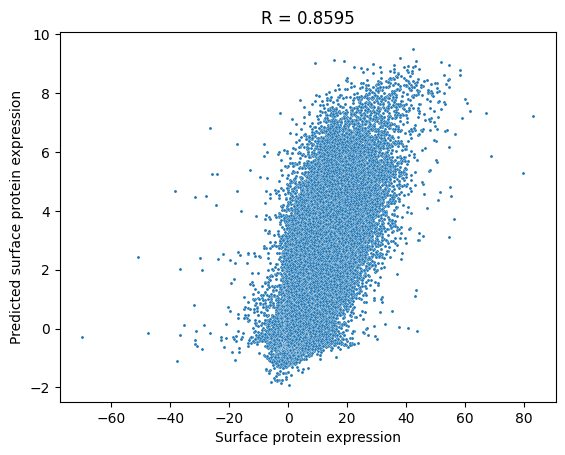

In [14]:
sns.scatterplot(data.to_pandas(), x="target", y="prediction", s=5)
plt.title(f"R = {cite_score:.4f}")
plt.xlabel("Surface protein expression")
plt.ylabel("Predicted surface protein expression")

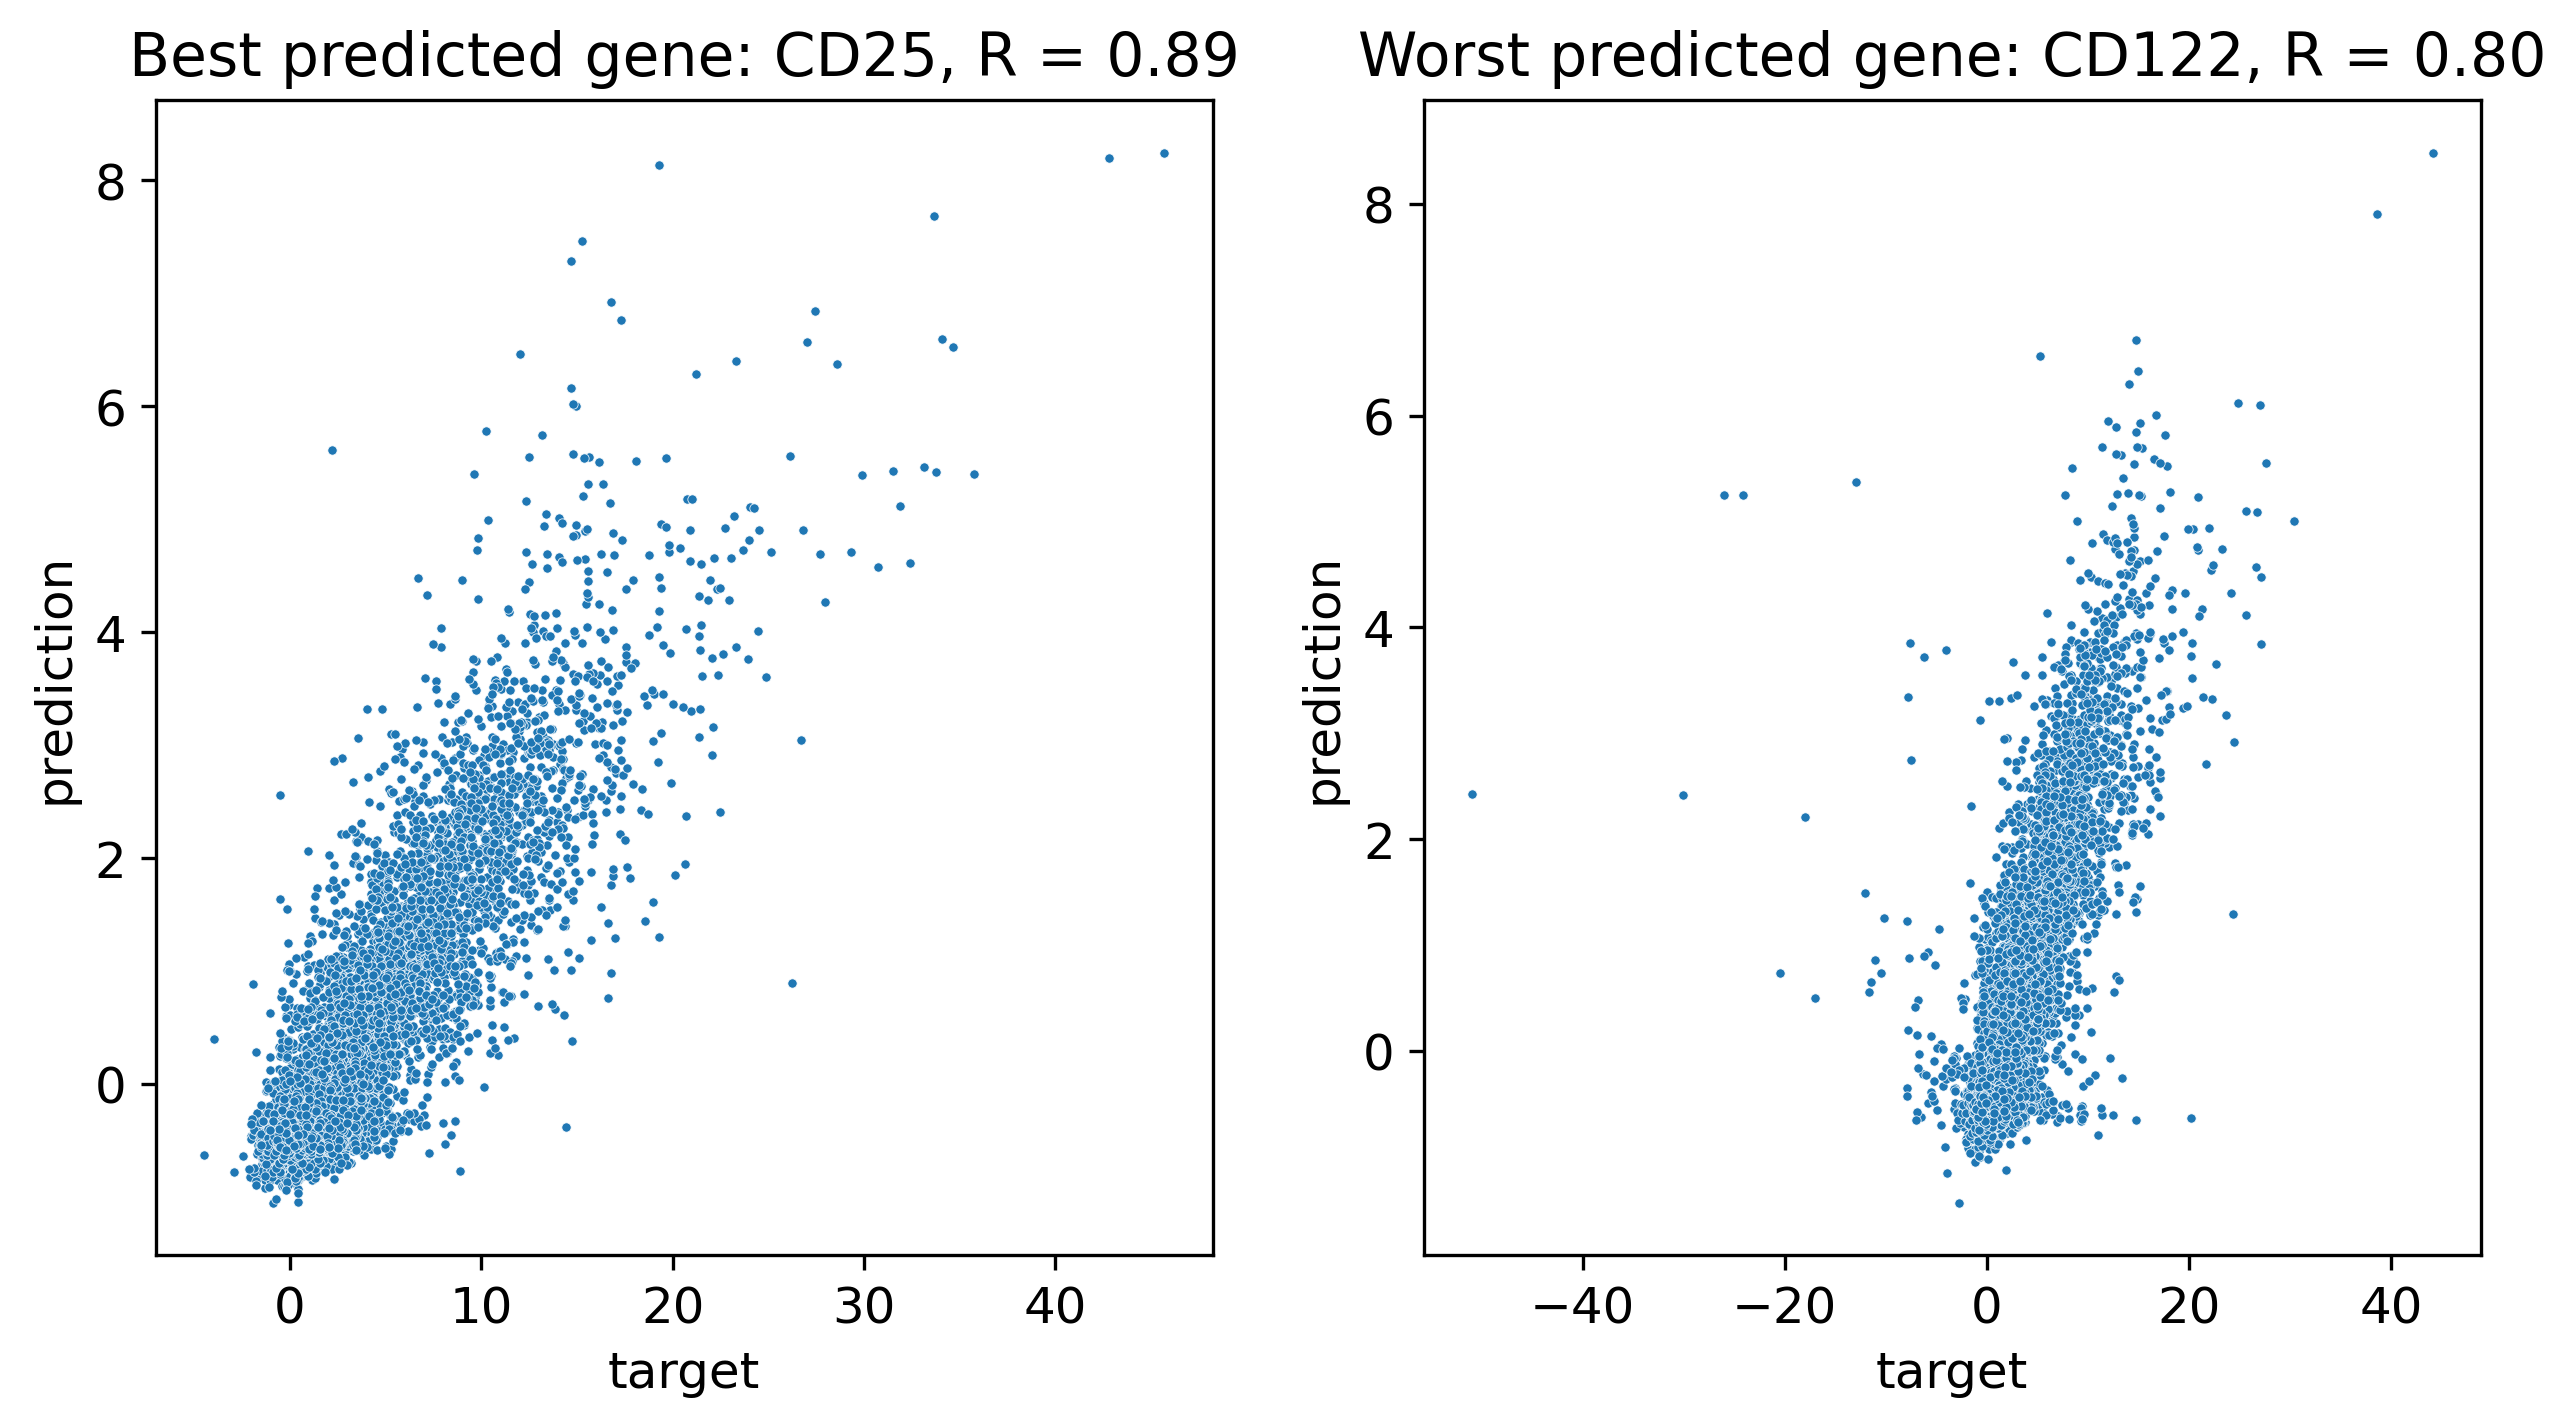

In [17]:
with plt.rc_context({"figure.dpi": 300, "font.size": 12}):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    sns.scatterplot(
        data.filter(data["gene"] == best_gene_name).to_pandas(), x="target", y="prediction", ax=axes[0], s=5
    )

    sns.scatterplot(
        data.filter(data["gene"] == worst_gene_name).to_pandas(), x="target", y="prediction", ax=axes[1], s=5
    )

    axes[0].set_title(f"Best predicted gene: {best_gene_name}, R = {best_gene_corr:.2f}")
    axes[1].set_title(f"Worst predicted gene: {worst_gene_name}, R = {worst_gene_corr:.2f}")

    plt.savefig("../figures/Supplementary_O2C1_best_and_worst_predicted_proteins.pdf", bbox_inches="tight")

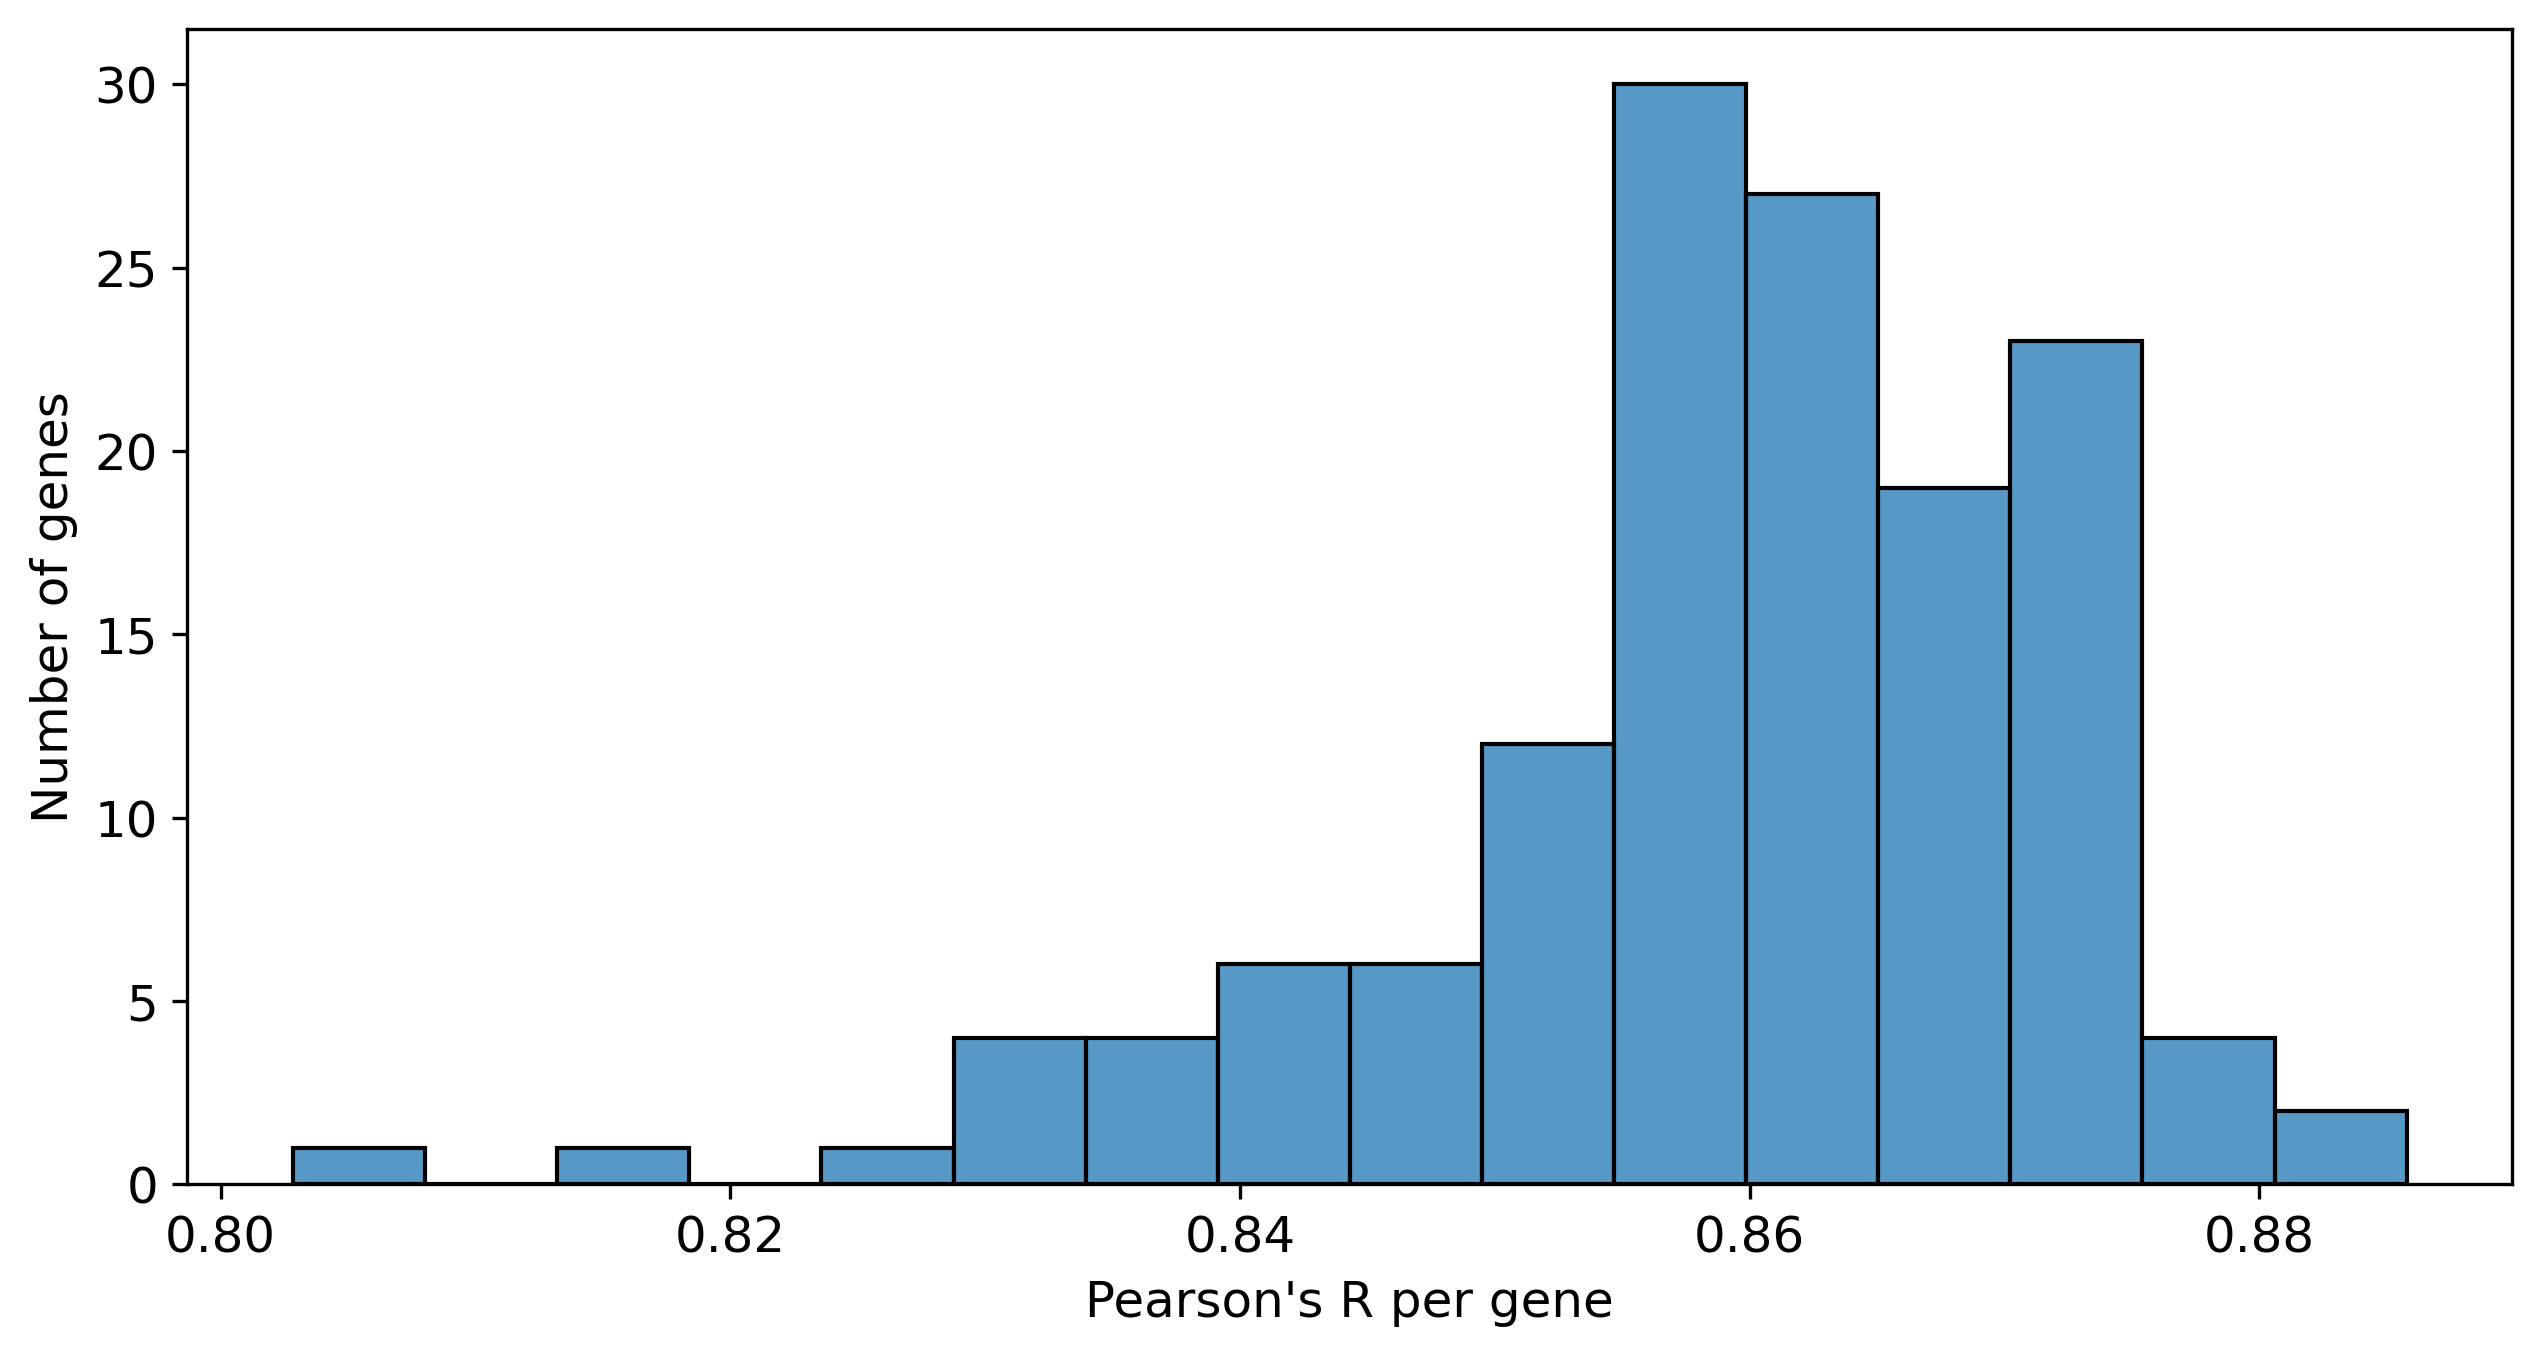

In [16]:
with plt.rc_context({"figure.figsize": (10, 5), "figure.dpi": 300, "font.size": 12}):
    sns.histplot(per_gene_corrs["prediction"])
    plt.xlabel("Pearson's R per gene")
    plt.ylabel("Number of genes")
    plt.savefig("../figures/Supplementary_O2C1_per_protein_correlation_distribution.pdf", bbox_inches="tight")